## Example of use of NC with AG-Segments
In this example, the NC (Nearest Centroid) algorithm is used for classificate EEG series. The Euclidean and DTW distances are used. In the case of DTW, the genetic algorithm GA-Segments is used for calculate the centroids.dataset. 

The dataset can be found in https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition. Two problems are raised:

- Binary classification: epilepsy vs no epilepsy.
- Multiclass classification: see dataset web for more information about the nature of the classes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier

from ga_segments.nc import NC

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path = './data/EEG.csv'
params_ga = {
    'pop_size': 100,   
    'ngen': 100,
    'batch_evaluate': True,
    'batch_size': 0.005,
    'multi_jobs': True}

In [3]:
def plot_series(x, class_name, n=20):
    """ Plot a random sample of 20 series.
    """
    idx_sample = np.array(range(len(x)), dtype=np.int32)
    np.random.shuffle(idx_sample)
    x_sample = x[idx_sample[:n]]
    
    plt.figure(figsize=(12, 2))
    plt.title('Class: {0}'.format(class_name))
    for s in x_sample:
        plt.plot(s)
    plt.show()

#### Load dataset and plot some series of each class

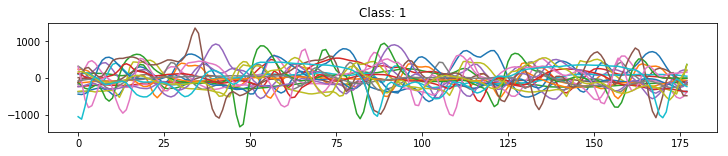

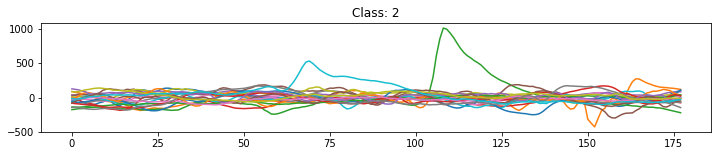

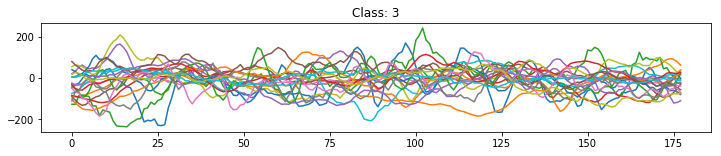

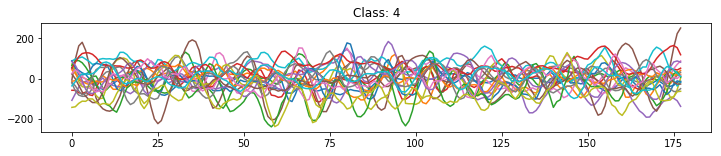

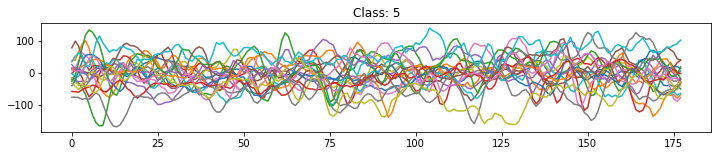

In [4]:
series = pd.read_csv(data_path)
series.drop('Unnamed: 0', axis=1, inplace=True)

X = series.drop('y', axis=1).values
y = series['y'].values.astype(np.int32)

y_5cat = y.copy()
y_2cat = y.copy()

# prepare labels for the binary classificaction problem: epilepsy vs no epilepsy
y_2cat[y_2cat != 1] = 2

X_5cat = X.copy()
X_2cat = X.copy()

for clase in np.unique(y):
    mask_clase = y == clase
    X_clase = X[mask_clase]
    plot_series(X_clase, clase)

#### Split dataset in train and validation

In [5]:
X_train_2cat, X_val_2cat, y_train_2cat, y_val_2cat = train_test_split(X_2cat, y_2cat, 
                                                                      test_size=0.2, 
                                                                      random_state=2018)

X_train_5cat, X_val_5cat, y_train_5cat, y_val_5cat = train_test_split(X_5cat, y_5cat, 
                                                                      test_size=0.2, 
                                                                      random_state=2018)

### 1. Binary problem

#### Search the centroids with AG-Segments for the two classes and classify using NC

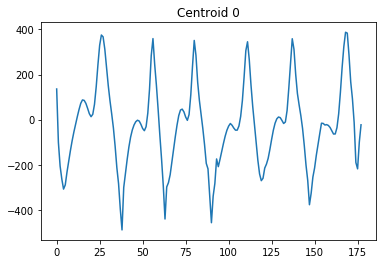

Error class[0]: 1385424675837.064
-------------------------


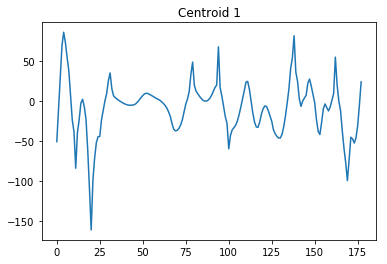

Error class[1]: 247935475748.404
-------------------------
Accuracy DTW NC: 0.946


In [6]:
nc2_dtw = NC(verbose=2, params_ga=params_ga)
nc2_dtw.fit(X_train_2cat, y_train_2cat)
nc2_dtw.predict(X_val_2cat)

nc2_dtw_accuracy = 1 - (nc2_dtw.labels != y_val_2cat).sum() / float(y_val_2cat.shape[0])
print('Accuracy DTW NC: {:.3f}'.format(nc2_dtw_accuracy))

#### Classify using NC with Euclidean distance.
As we see, the centroid calculated using DTW distance is more representative achieving better accuracy.

In [7]:
nc_euclidean = NearestCentroid()
nc_euclidean.fit(X_train_2cat, y_train_2cat)
print('Accuracy Euclidean NC: {:.3f}'.format(nc_euclidean.score(X_val_2cat, y_val_2cat)))

Accuracy Euclidean NC: 0.633


### 2. Multiclass problem

#### Search the centroids with AG-Segments for the five classes  and classify using NC

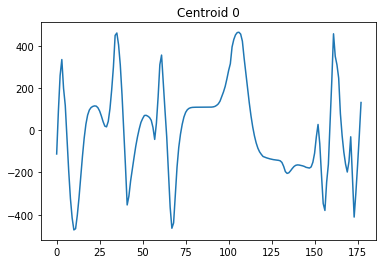

Error class[0]: 1352873944610.308
-------------------------


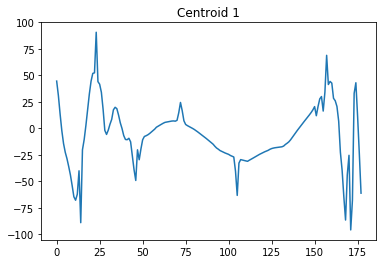

Error class[1]: 112222091739.758
-------------------------


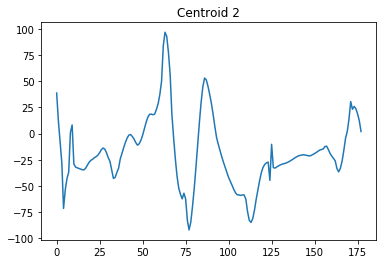

Error class[2]: 41645706725.924
-------------------------


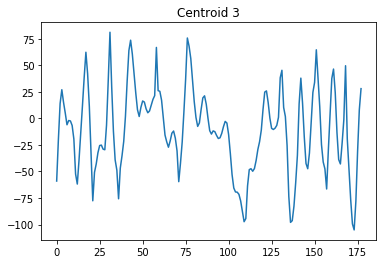

Error class[3]: 63517825130.595
-------------------------


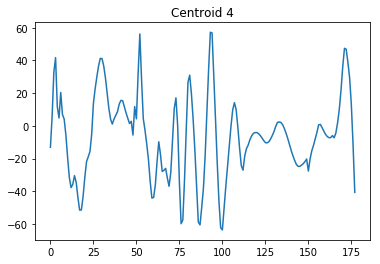

Error class[4]: 30240661214.462
-------------------------
Accuracy DTW NC: 0.525


In [8]:
nc5_dtw = NC(verbose=2, params_ga=params_ga)
nc5_dtw.fit(X_train_5cat, y_train_5cat)
nc5_dtw.predict(X_val_5cat)

nc5_dtw_accuracy = 1 - (nc5_dtw.labels != y_val_5cat).sum() / float(y_val_5cat.shape[0])
print('Accuracy DTW NC: {:.3f}'.format(nc5_dtw_accuracy))

#### As we see, the centroid calculated using DTW distance is more representative.

In [9]:
nc_euclidean = NearestCentroid()
nc_euclidean.fit(X_train_5cat, y_train_5cat)
print('Accuracy Euclidean NC: {:.3f}'.format(nc_euclidean.score(X_val_5cat, y_val_5cat)))

Accuracy Euclidean NC: 0.248
